# Trabalho Prático

Imports

In [1]:
!pip3 install graphviz
#pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.tree import export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Leitura do Arquivo CSV:

In [3]:
data = pd.read_csv('heart2.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Tratamento de dados categóricos

In [4]:

label_data = ['Sex', 'ExerciseAngina', 'Oldpeak', 'RestingECG', 'ST_Slope']

one_hot_data = ['ChestPainType']

lb = LabelEncoder() 


for col in label_data:
    data[col] = lb.fit_transform(data[col])

#Use pandas get_dummies for one-hot encoding
data = pd.get_dummies(data, columns=one_hot_data)

data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,10,2,0,False,True,False,False
1,49,0,160,180,0,1,156,0,20,1,1,False,False,True,False
2,37,1,130,283,0,2,98,0,10,2,0,False,True,False,False
3,48,0,138,214,0,1,108,1,25,1,1,True,False,False,False
4,54,1,150,195,0,1,122,0,10,2,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,0,22,1,1,False,False,False,True
914,68,1,144,193,1,1,141,0,42,1,1,True,False,False,False
915,57,1,130,131,0,1,115,1,22,1,1,True,False,False,False
916,57,0,130,236,0,0,174,0,10,1,1,False,True,False,False


### Pre processamento

Knn Imputer

In [5]:
imputer = KNNImputer(missing_values=-1)
imputer.fit_transform(data)



array([[ 40.,   1., 140., ...,   1.,   0.,   0.],
       [ 49.,   0., 160., ...,   0.,   1.,   0.],
       [ 37.,   1., 130., ...,   1.,   0.,   0.],
       ...,
       [ 57.,   1., 130., ...,   0.,   0.,   0.],
       [ 57.,   0., 130., ...,   1.,   0.,   0.],
       [ 38.,   1., 138., ...,   0.,   1.,   0.]])

Normalização dos dados

In [6]:
scaler = MinMaxScaler()
data[label_data] = scaler.fit_transform(data[label_data])

data[label_data].head()

,Sex,ExerciseAngina,Oldpeak,RestingECG,ST_Slope
0,1.0,0.0,0.192308,0.5,1.0
1,0.0,0.0,0.384615,0.5,0.5
2,1.0,0.0,0.192308,1.0,1.0
3,0.0,1.0,0.480769,0.5,0.5
4,1.0,0.0,0.192308,0.5,1.0


### Separar teste e treino

In [7]:

x = data.drop(columns=["HeartDisease"])
y = data["HeartDisease"]

X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 23)



## Árvore de decisão

### Criar modelo

In [31]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

#Teste do Modelo
prevision = modelo.predict(X_teste)


In [34]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(modelo, x, y, cv=kfold, scoring='accuracy')

print(f'Acurácia para cada fold: {scores}')
print(f'Acurácia média: {scores.mean()}')

Acurácia para cada fold: [0.83695652 0.7826087  0.80434783 0.83695652 0.83695652 0.75
 0.70652174 0.76086957 0.81318681 0.74725275]
Acurácia média: 0.7875656951743908


### Gerar matriz de confusão

c:\Users\eduol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x000001DB8BB51390>,
                estimator=DecisionTreeClassifier(criterion='entropy'))

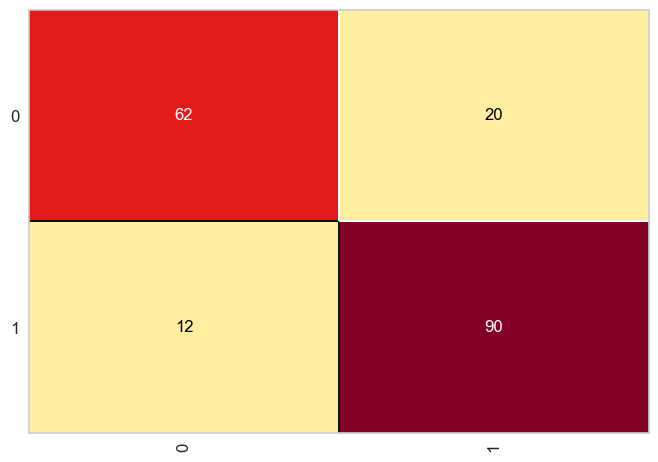

In [76]:
from yellowbrick.classifier import ConfusionMatrix

confusion_matrix(y_teste, prevision)
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

cm

In [77]:
print(classification_report(y_teste, prevision))
print(accuracy_score(y_teste, prevision))

              precision    recall  f1-score   support

           0       0.84      0.76      0.79        82
           1       0.82      0.88      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184

0.8260869565217391


### Plotando a árvore

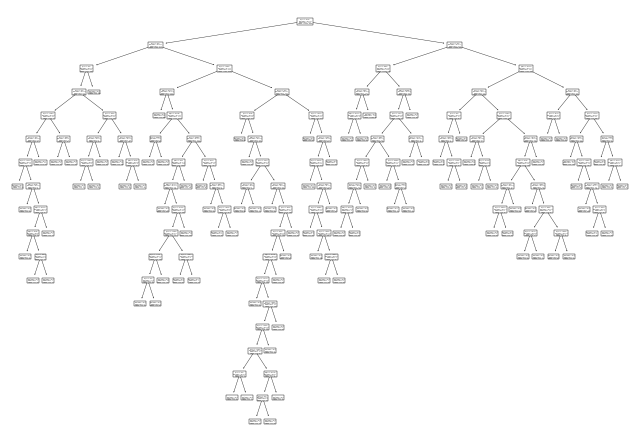

In [78]:
tree.plot_tree(Y)
plt.show()


### Cálculo da cobertura das regras

In [11]:
# Criar um DataFrame com os rótulos verdadeiros, previstos e os dados de teste
df_resultados = pd.DataFrame({'True': y_teste, 'Predicted': prevision})
df_resultados = pd.concat([df_resultados, X_teste], axis=1)  # Adiciona as features de teste ao DataFrame

# Extrair as regras da árvore
def extrair_regras(arvore, features):
    regras = []
    for node_id in range(arvore.node_count):
        if arvore.children_left[node_id] == arvore.children_right[node_id]:
            # Folha da árvore
            continue
        else:
            regra = (features[arvore.feature[node_id]], arvore.threshold[node_id], node_id)
            regras.append(regra)
    return regras

# Calcular a cobertura para cada regra
n_samples = len(X_teste)
coverage = []
regras = extrair_regras(modelo.tree_, X_teste.columns)

for feature, threshold, node_id in regras:
    mask = (X_teste[feature] <= threshold)
    regra_cobertura = mask.sum() / n_samples
    coverage.append(regra_cobertura)

# Inicializar um dicionário para armazenar as contagens de instâncias corretas para cada regra
instancias_corretas_por_regra = {}

# Iterar sobre as regras
for i, (regra, rule_coverage) in enumerate(zip(regras, coverage)):
    feature, threshold, node_id = regra
    
    # Aplicar a máscara da regra aos dados de teste
    mask = (df_resultados[feature] <= threshold)
    
    # Filtrar as instâncias que atendem à regra
    instancias_regra = df_resultados[mask]
    
    # Contar as instâncias corretas (True Positive)
    instancias_corretas = instancias_regra[instancias_regra['True'] == instancias_regra['Predicted']]
    
    # Calcular a porcentagem de instâncias corretas para a regra
    porcentagem_corretas = len(instancias_corretas) / len(instancias_regra) * 100

    # Armazenar a porcentagem no dicionário
    instancias_corretas_por_regra[f'Regra {i + 1}'] = porcentagem_corretas

    # Imprimir as instâncias corretas para a regra
    print(f"Regra {i + 1}: Se {feature} <= {threshold:.2f} no nó {node_id}")
    print(f"Porcentagem de Instâncias Corretas: {porcentagem_corretas:.2f}%\n")


Regra 1: Se ST_Slope <= 0.75 no nó 0
Porcentagem de Instâncias Corretas: 77.88%

Regra 2: Se Sex <= 0.50 no nó 1
Porcentagem de Instâncias Corretas: 76.92%

Regra 3: Se FastingBS <= 0.50 no nó 2
Porcentagem de Instâncias Corretas: 80.29%

Regra 4: Se ExerciseAngina <= 0.50 no nó 3
Porcentagem de Instâncias Corretas: 76.11%

Regra 5: Se RestingBP <= 148.00 no nó 4
Porcentagem de Instâncias Corretas: 83.23%

Regra 6: Se ChestPainType_NAP <= 0.50 no nó 5
Porcentagem de Instâncias Corretas: 81.51%

Regra 7: Se MaxHR <= 144.00 no nó 6
Porcentagem de Instâncias Corretas: 86.36%

Regra 8: Se Oldpeak <= 0.25 no nó 8
Porcentagem de Instâncias Corretas: 84.88%

Regra 9: Se ST_Slope <= 0.25 no nó 10
Porcentagem de Instâncias Corretas: 72.22%

Regra 10: Se Oldpeak <= 0.40 no nó 12
Porcentagem de Instâncias Corretas: 79.66%

Regra 11: Se Cholesterol <= 256.50 no nó 13
Porcentagem de Instâncias Corretas: 83.20%

Regra 12: Se Oldpeak <= 0.63 no nó 18
Porcentagem de Instâncias Corretas: 82.80%

Regra 

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

#Definição dos Hiperparâmetros
rf = RandomForestRegressor(random_state=23, n_jobs=-1)

parameters = {
    'n_estimators': [5, 10, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'bootstrap': [True, False],
}

grid = GridSearchCV(rf, parameters, verbose=1, scoring='r2')
grid.fit(X_treino, y_treino)
print('Best Model: ' + str(grid.best_estimator_))


model = RandomForestClassifier(n_estimators=2, max_features='sqrt', random_state = 23, bootstrap = False, max_depth = 50, min_samples_leaf = 3, n_jobs = -1)
model.fit(X_treino, y_treino)
prevision2 = model.predict(X_teste)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Model: RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=3, n_estimators=50, n_jobs=-1,
                      random_state=23)


In [20]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

print(f'Acurácia para cada fold: {scores}')
print(f'Acurácia média: {scores.mean()}')

Acurácia para cada fold: [0.84782609 0.84782609 0.88043478 0.84782609 0.84782609 0.83695652
 0.82608696 0.77173913 0.86813187 0.78021978]
Acurácia média: 0.8354873387482084


c:\Users\eduol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x000001DB8BB51390>,
                estimator=DecisionTreeClassifier(criterion='entropy'))

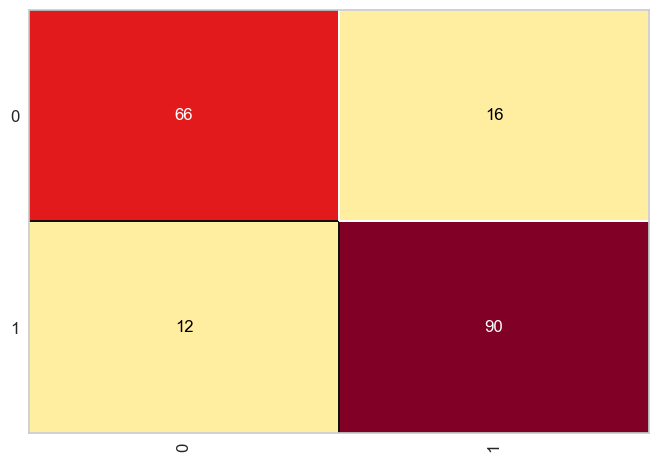

In [81]:
confusion_matrix(y_teste, prevision2)
cm2 = ConfusionMatrix(model)
cm2.fit(X_treino, y_treino)
cm2.score(X_teste, y_teste)

cm

In [82]:
print(classification_report(y_teste, prevision2))
print(accuracy_score(y_teste, prevision2))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        82
           1       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

0.8478260869565217


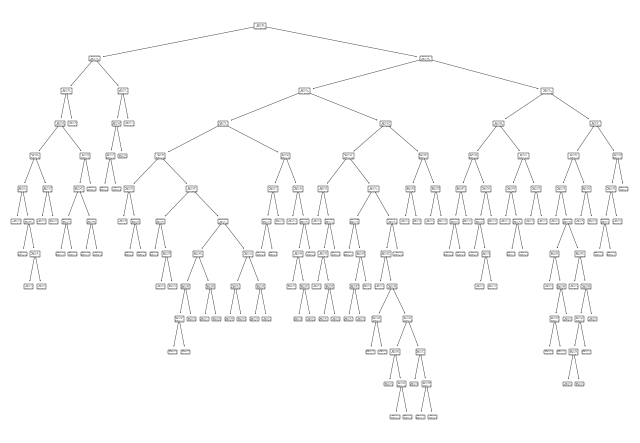

Regra 1: Se ST_Slope <= 0.75 no nó 0
Porcentagem de Instâncias Corretas: 78.76%

Regra 2: Se Sex <= 0.50 no nó 1
Porcentagem de Instâncias Corretas: 82.05%

Regra 3: Se FastingBS <= 0.50 no nó 2
Porcentagem de Instâncias Corretas: 82.48%

Regra 4: Se ExerciseAngina <= 0.50 no nó 3
Porcentagem de Instâncias Corretas: 77.88%

Regra 5: Se RestingBP <= 148.00 no nó 4
Porcentagem de Instâncias Corretas: 81.99%

Regra 6: Se ChestPainType_NAP <= 0.50 no nó 5
Porcentagem de Instâncias Corretas: 82.88%

Regra 7: Se MaxHR <= 144.00 no nó 6
Porcentagem de Instâncias Corretas: 85.45%

Regra 8: Se Oldpeak <= 0.25 no nó 8
Porcentagem de Instâncias Corretas: 86.05%

Regra 9: Se Oldpeak <= 0.66 no nó 10
Porcentagem de Instâncias Corretas: 81.13%

Regra 10: Se RestingECG <= 0.25 no nó 11
Porcentagem de Instâncias Corretas: 80.49%

Regra 11: Se Age <= 55.00 no nó 13
Porcentagem de Instâncias Corretas: 84.40%

Regra 12: Se Age <= 65.50 no nó 18
Porcentagem de Instâncias Corretas: 82.14%

Regra 13: Se Age

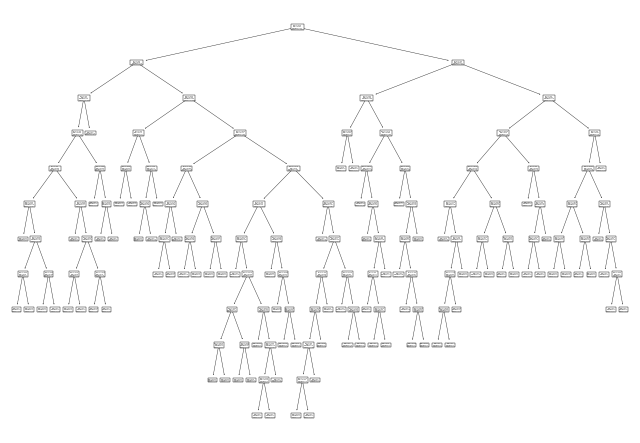

Regra 1: Se ST_Slope <= 0.75 no nó 0
Porcentagem de Instâncias Corretas: 78.76%

Regra 2: Se Sex <= 0.50 no nó 1
Porcentagem de Instâncias Corretas: 82.05%

Regra 3: Se FastingBS <= 0.50 no nó 2
Porcentagem de Instâncias Corretas: 82.48%

Regra 4: Se ExerciseAngina <= 0.50 no nó 3
Porcentagem de Instâncias Corretas: 77.88%

Regra 5: Se RestingBP <= 148.00 no nó 4
Porcentagem de Instâncias Corretas: 81.99%

Regra 6: Se ChestPainType_NAP <= 0.50 no nó 5
Porcentagem de Instâncias Corretas: 82.88%

Regra 7: Se MaxHR <= 144.00 no nó 6
Porcentagem de Instâncias Corretas: 85.45%

Regra 8: Se Oldpeak <= 0.25 no nó 8
Porcentagem de Instâncias Corretas: 86.05%

Regra 9: Se Oldpeak <= 0.66 no nó 10
Porcentagem de Instâncias Corretas: 81.13%

Regra 10: Se RestingECG <= 0.25 no nó 11
Porcentagem de Instâncias Corretas: 80.49%

Regra 11: Se Age <= 55.00 no nó 13
Porcentagem de Instâncias Corretas: 84.40%

Regra 12: Se Age <= 65.50 no nó 18
Porcentagem de Instâncias Corretas: 82.14%

Regra 13: Se Age

In [83]:

for decision_tree in model.estimators_:
   tree.plot_tree(decision_tree)
   plt.show() 

   # Criar um DataFrame com os rótulos verdadeiros, previstos e os dados de teste
   df_resultados = pd.DataFrame({'True': y_teste, 'Predicted': prevision})
   df_resultados = pd.concat([df_resultados, X_teste], axis=1)  # Adiciona as features de teste ao DataFrame

   # Extrair as regras da árvore
   def extrair_regras(arvore, features):
      regras = []
      for node_id in range(arvore.node_count):
         if arvore.children_left[node_id] == arvore.children_right[node_id]:
               # Folha da árvore
               continue
         else:
               regra = (features[arvore.feature[node_id]], arvore.threshold[node_id], node_id)
               regras.append(regra)
      return regras

   # Calcular a cobertura para cada regra
   n_samples = len(X_teste)
   coverage = []
   regras = extrair_regras(modelo.tree_, X_teste.columns)

   for feature, threshold, node_id in regras:
      mask = (X_teste[feature] <= threshold)
      regra_cobertura = mask.sum() / n_samples
      coverage.append(regra_cobertura)

   # Inicializar um dicionário para armazenar as contagens de instâncias corretas para cada regra
   instancias_corretas_por_regra = {}

   # Iterar sobre as regras
   for i, (regra, rule_coverage) in enumerate(zip(regras, coverage)):
      feature, threshold, node_id = regra
      
      # Aplicar a máscara da regra aos dados de teste
      mask = (df_resultados[feature] <= threshold)
      
      # Filtrar as instâncias que atendem à regra
      instancias_regra = df_resultados[mask]
      
      # Contar as instâncias corretas (True Positive)
      instancias_corretas = instancias_regra[instancias_regra['True'] == instancias_regra['Predicted']]
      
      # Calcular a porcentagem de instâncias corretas para a regra
      porcentagem_corretas = len(instancias_corretas) / len(instancias_regra) * 100

      # Armazenar a porcentagem no dicionário
      instancias_corretas_por_regra[f'Regra {i + 1}'] = porcentagem_corretas

      # Imprimir as instâncias corretas para a regra
      print(f"Regra {i + 1}: Se {feature} <= {threshold:.2f} no nó {node_id}")
      print(f"Porcentagem de Instâncias Corretas: {porcentagem_corretas:.2f}%\n")


   

## Naive Bayes

In [23]:
model = GaussianNB()
naive = model.fit(X_treino, y_treino)

y_pred = model.predict(X_teste)
accuracy = accuracy_score(y_pred, y_teste)

print(classification_report(y_teste, y_pred))
print(accuracy_score(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.84      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

0.8478260869565217


In [24]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

print(f'Acurácia para cada fold: {scores}')
print(f'Acurácia média: {scores.mean()}')

Acurácia para cada fold: [0.79347826 0.86956522 0.91304348 0.80434783 0.86956522 0.84782609
 0.79347826 0.80434783 0.87912088 0.75824176]
Acurácia média: 0.8333014811275682


Variância explicada por cada CP: [0.92404197 0.05029419]
Variância acumulativa explicada: [0.92404197 0.97433616]


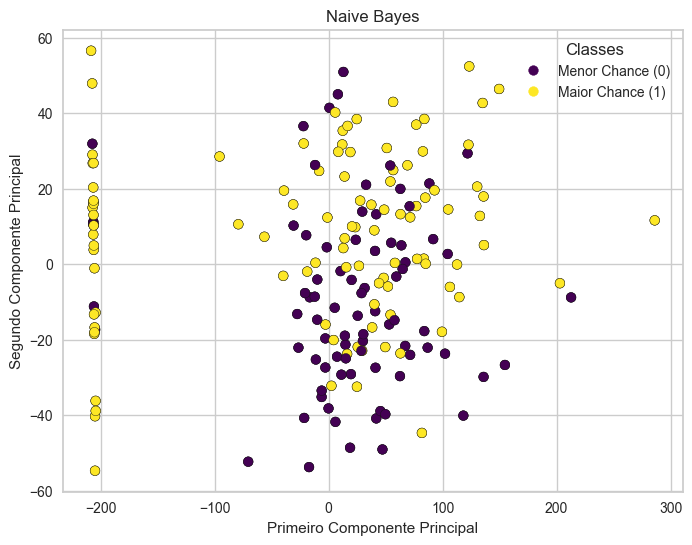

In [85]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_teste)

# Obtém a variância explicada pelos componentes principais
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por cada CP:", explained_variance)
cumulative_explained_variance = explained_variance.cumsum()
print("Variância acumulativa explicada:", cumulative_explained_variance)

# Plotagem das previsões
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_teste, cmap='viridis', edgecolor='k')
plt.title('Naive Bayes')

# Legenda
classes = sorted(set(y_teste))
legend_labels = ['Menor Chance (0)', 'Maior Chance (1)']
sc = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_teste, cmap='viridis', edgecolor='k')
plt.legend(handles=sc.legend_elements()[0], labels=legend_labels, title='Classes')

# Eixos
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')

plt.show()

## Gradient Boosting

In [29]:
from xgboost import XGBClassifier

# Criando o modelo XGBoost
model = XGBClassifier()
model.fit(X_treino, y_treino) 
y_pred = model.predict(X_teste)

# Avaliando o desempenho do modelo
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))
print("Acurácia:", accuracy_score(y_teste, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        82
           1       0.83      0.93      0.88       102

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.85       184
weighted avg       0.86      0.85      0.85       184

Acurácia: 0.8532608695652174


In [39]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

print(f'Acurácia para cada fold: {scores}')
print(f'Acurácia média: {scores.mean()}')

Acurácia para cada fold: [0.83695652 0.89130435 0.88043478 0.89130435 0.86956522 0.83695652
 0.81521739 0.7826087  0.91208791 0.82417582]
Acurácia média: 0.8540611562350694


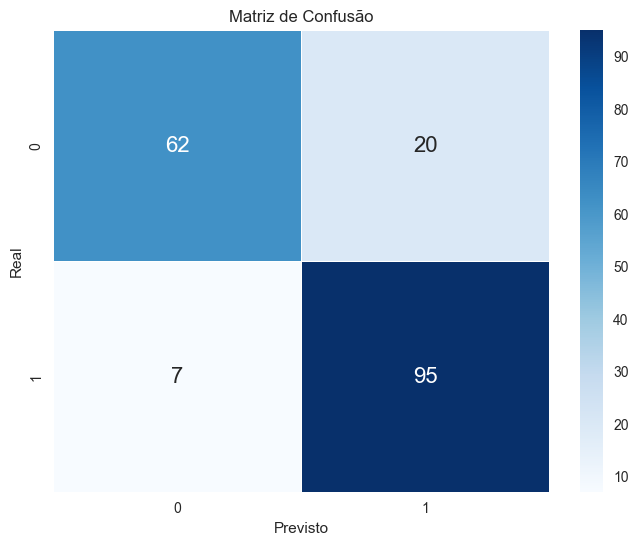

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de Confusão
cm = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

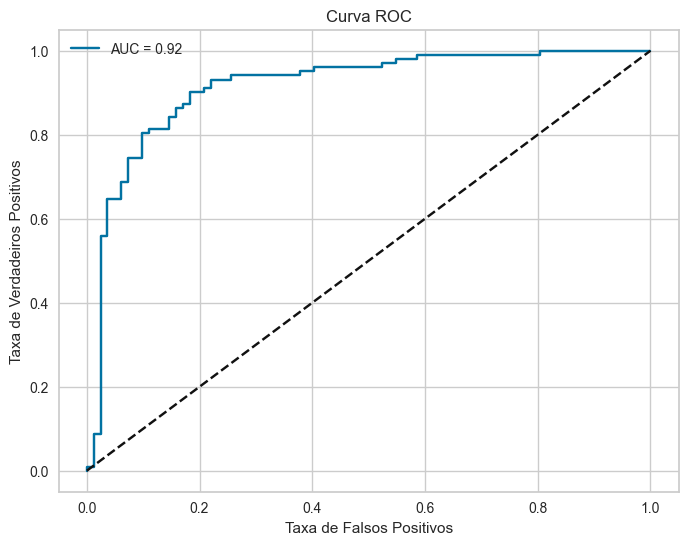

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_teste)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)

# AUC
auc = roc_auc_score(y_teste, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

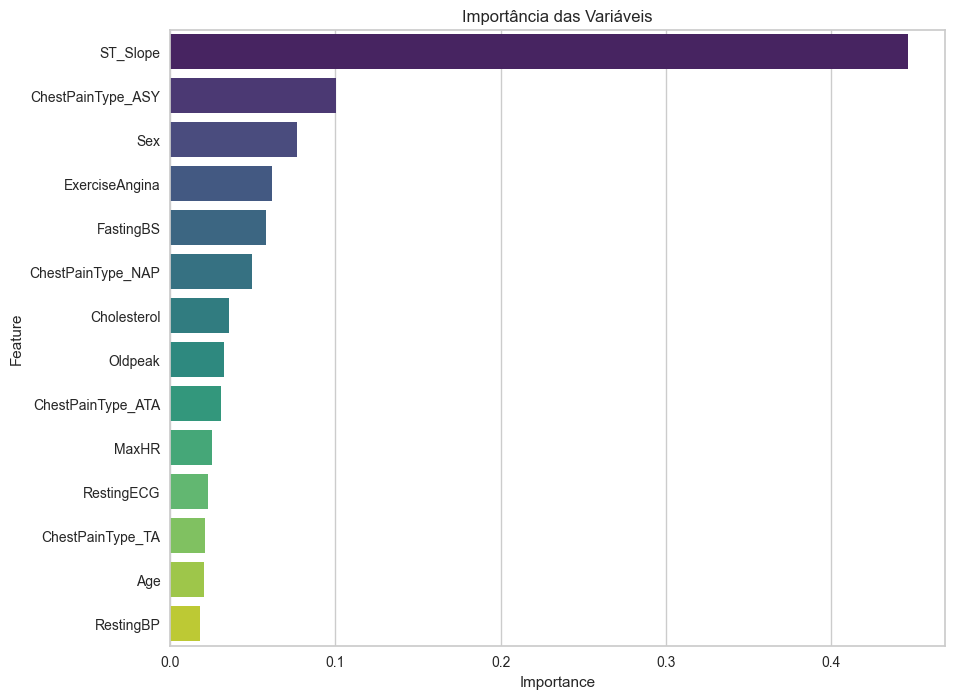

In [89]:
# Importância das variáveis
feature_importance = model.feature_importances_

feature_df = pd.DataFrame({'Feature': X_treino.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Importância das Variáveis')
plt.show()